In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

# Initialize lists to collect model performance
model_names = []
model_maes = []
model_mabs = []

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

# Read, pre-process and visualize data

In [2]:
data_set = pd.read_csv('Index closing price from 1994 to 2021.csv')
data_set.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,"2,224.95","3,446.00","18,124.01"
1,1994-01-10,475.27,"2,225.00","3,440.60","18,443.44"
2,1994-01-11,474.13,"2,228.10","3,413.80","18,485.25"
3,1994-01-12,474.17,"2,182.06","3,372.00","18,793.88"
4,1994-01-13,472.47,"2,142.37","3,360.00","18,577.26"


In [3]:
len(data_set)
data_set.isna().sum()
data_set.dtypes

7255

Date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [4]:
data_set.columns

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'])

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()

Index(['Date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

,Date,spx,dax,ftse,nikkei
7250,1634860800,"4,544.90","15,542.98","7,204.60","28,804.85"
7251,1635120000,"4,566.48","15,599.23","7,222.80","28,600.41"
7252,1635206400,"4,574.79","15,757.06","7,277.60","29,106.01"
7253,1635292800,"4,551.68","15,705.81","7,253.30","29,098.24"
7254,1635379200,"4,596.42","15,696.33","7,249.50","28,820.09"


In [5]:
data_set['spx_next_day'] = data_set['spx'].shift(-1)
data_set = data_set.dropna()
data_set.head ()

,Date,spx,dax,ftse,nikkei,spx_next_day
0,757900800,469.90,"2,224.95","3,446.00","18,124.01",475.27
1,758160000,475.27,"2,225.00","3,440.60","18,443.44",474.13
2,758246400,474.13,"2,228.10","3,413.80","18,485.25",474.17
3,758332800,474.17,"2,182.06","3,372.00","18,793.88",472.47
4,758419200,472.47,"2,142.37","3,360.00","18,577.26",474.91


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['spx','spx_next_day']), data_set['spx_next_day'], test_size=0.2, random_state=50)
## Removing the Date feature resulted in higher Mean Absolute Error (MAE) across all models
X_train
X_test
y_train
y_test

,Date,dax,ftse,nikkei
2168,1020211200,"5,041.20","5,125.50","11,552.79"
403,806716800,"2,237.73","3,454.30","16,387.25"
5834,1463616000,"9,795.89","6,053.40","16,646.66"
100,769996800,"2,112.80","2,966.40","20,777.16"
1452,933638400,"5,107.68","6,250.70","17,969.93"
...,...,...,...,...
2014,1001548800,"4,184.50","4,763.60","9,696.53"
6253,1514332800,"13,070.02","7,620.70","22,911.21"
1931,991612800,"6,177.74","5,856.50","13,312.35"
5600,1435276800,"11,492.43","6,753.70","20,706.15"


,Date,dax,ftse,nikkei
7066,1612742400,"14,059.91","6,523.50","29,388.50"
5467,1419292800,"9,922.11","6,598.20","17,635.14"
6232,1511827200,"13,059.53","7,460.70","22,486.24"
809,855792000,"3,256.86","4,327.10","18,688.06"
6800,1580428800,"12,981.97","7,286.00","23,205.18"
...,...,...,...,...
4113,1255478400,"5,854.14","5,256.10","10,060.21"
73,766800000,"2,194.09","3,098.30","19,882.18"
4750,1332460800,"6,995.62","5,854.90","10,011.47"
810,855878400,"3,249.17","4,341.00","18,722.00"


2168   1,084.56
403      565.22
5834   2,052.32
100      457.33
1452   1,305.33
         ...   
2014   1,040.94
6253   2,687.54
1931   1,283.57
5600   2,057.64
5808   2,082.78
Name: spx_next_day, Length: 5803, dtype: float64

7066   3,911.23
5467   2,081.88
6232   2,626.07
809      808.48
6800   3,248.92
         ...   
4113   1,096.56
73       448.73
4750   1,416.51
810      808.48
1438   1,409.62
Name: spx_next_day, Length: 1451, dtype: float64

# Decison tree


In [7]:
clf = DecisionTreeRegressor(random_state=50)

clf = clf.fit(X_train, y_train) 

In [8]:
X_train.columns
clf.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.89420366, 0.02948057, 0.07197094, 0.00434483])

In [9]:
test_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("Decision Tree")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,934.83","3,911.23"
5467,"2,082.17","2,081.88"
6232,"2,647.58","2,626.07"
809,802.77,808.48
6800,"3,128.21","3,248.92"


Mean absolute error is 
16.907492450316933
Mean absolute percentage error is 
0.010801955770984847


## Bagging Regressor ## 

In [10]:
regr = BaggingRegressor(random_state=50, n_estimators = 200, max_samples = 1000)

regr = regr.fit(X_train, y_train) 

In [11]:
test_output = pd.DataFrame(regr.predict(X_test), index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("Bagging Regressor")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,877.19","3,911.23"
5467,"2,065.54","2,081.88"
6232,"2,617.79","2,626.07"
809,797.91,808.48
6800,"3,175.66","3,248.92"


Mean absolute error is 
16.26863821711899
Mean absolute percentage error is 
0.010393800913522157


## Random Forest Regressor 

In [12]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, y_train) 


In [13]:
X_train.columns
rf.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.50536628, 0.32185065, 0.07935912, 0.09342395])

In [14]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("Random Forest Regressor")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,901.41","3,911.23"
5467,"2,077.91","2,081.88"
6232,"2,621.98","2,626.07"
809,801.58,808.48
6800,"3,188.96","3,248.92"


Mean absolute error is 
14.014519641069898
Mean absolute percentage error is 
0.008953676706305301


## Gradeint Boosting Regressor

In [15]:
gb = GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4)

gb = gb.fit(X_train, y_train) 


In [16]:
X_train.columns
gb.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.77527885, 0.12920128, 0.0797666 , 0.01575327])

In [17]:
test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("Gradeint Boosting Regressor")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,891.20","3,911.23"
5467,"2,041.46","2,081.88"
6232,"2,642.27","2,626.07"
809,782.43,808.48
6800,"3,239.66","3,248.92"


Mean absolute error is 
18.392697289821175
Mean absolute percentage error is 
0.011750831959119815


## XGBoost Regressor 

In [18]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [19]:
params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [20]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [21]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [22]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("XGBoost Regressor")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,881.28","3,911.23"
5467,"2,033.99","2,081.88"
6232,"2,646.57","2,626.07"
809,779.21,808.48
6800,"3,221.40","3,248.92"


Mean absolute error is 
18.912911833770444
Mean absolute percentage error is 
0.012083189611307187


## Hybrid Model 

In [23]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

LinearRegression()

0.9318562671619951

In [24]:
training_residuals = y_train - model.predict(X_train)

In [25]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, training_residuals) 

In [26]:
pred_residuals = rf.predict(X_test)
y_pred = pred_residuals + model.predict(X_test)

In [27]:
test_output = pd.DataFrame(y_pred, index = X_test.index, columns = ['pred_spx_next_day'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
mean_absolute_percentage_error = abs(test_output['pred_spx_next_day'] - test_output['spx_next_day']).mean() / test_output['spx_next_day'].mean()
print('Mean absolute percentage error is ')
print(mean_absolute_percentage_error)

model_names.append("Hybrid Model")
model_maes.append(mean_absolute_error)
model_mabs.append(mean_absolute_percentage_error)

,pred_spx_next_day,spx_next_day
7066,"3,917.75","3,911.23"
5467,"2,083.09","2,081.88"
6232,"2,623.02","2,626.07"
809,804.68,808.48
6800,"3,198.38","3,248.92"


Mean absolute error is 
15.429546430800242
Mean absolute percentage error is 
0.009857717139405676


## Plotting a Graph for Comparing Results


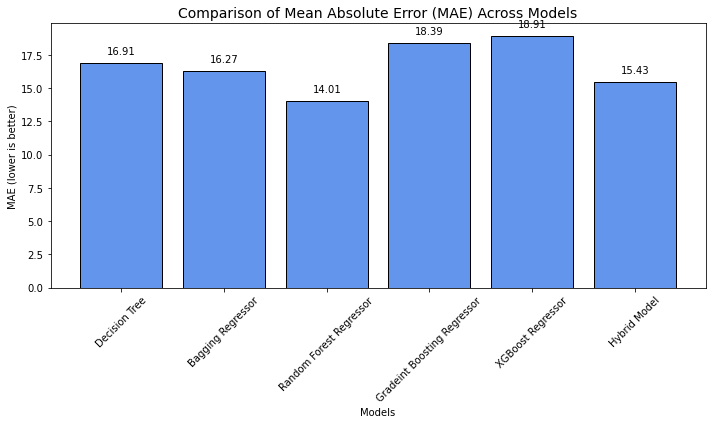

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Model': model_names, 'MAE': model_maes})

plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['MAE'], color='cornflowerblue', edgecolor='black')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('MAE (lower is better)')
plt.xticks(rotation=45)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show();


# Plotting a Graph using MAPE

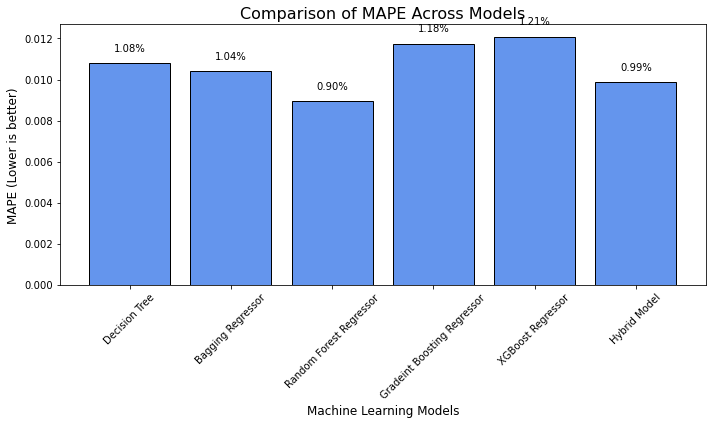

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame with model names and MAPE values
df = pd.DataFrame({'Model': model_names, 'MAPE': model_mabs})

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['MAPE'], color='cornflowerblue', edgecolor='black')

# Add title and axis labels
plt.title('Comparison of MAPE Across Models', fontsize=16)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('MAPE (Lower is better)', fontsize=12)
plt.xticks(rotation=45)

# Annotate each bar with its height (as percentage)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.0005, f"{yval:.2%}", 
             ha='center', va='bottom', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show();
